### **재무 정보 호출을 위한 yfinance 설치**

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

### **필수 라이브러리 불러오기**

In [7]:
from crewai.tools import tool

import yfinance as yf

from datetime import datetime, timedelta
import pandas as pd

### **yfinance를 통해 재무 정보 가져오는 방법**

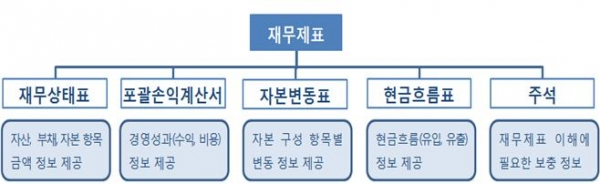

In [8]:
from IPython.display import Image
Image("https://cdn.ilyoeconomy.com/news/photo/201809/39218_36305_1848.jpg")

In [9]:
ticker = yf.Ticker("META")

In [10]:
help(ticker)

Help on Ticker in module yfinance.ticker object:

class Ticker(yfinance.base.TickerBase)
 |  Ticker(ticker, session=None, proxy=None)
 |  
 |  Method resolution order:
 |      Ticker
 |      yfinance.base.TickerBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ticker, session=None, proxy=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  option_chain(self, date=None, tz=None)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  actions
 |  
 |  analyst_price_targets
 |  
 |  balance_sheet
 |  
 |  balancesheet
 |  
 |  calendar
 |      Returns a dictionary of events, earnings, and dividends for the ticker
 |  
 |  capital_gains
 |  
 |  cash_flow
 |  
 |  cashflow
 |  
 |  dividends
 |  
 |  earnings
 |  
 |  earnings_dates
 |  
 |  earnings_estimate
 |  
 |  earnings_history
 |  
 |  eps_revisi

In [11]:
ticker.history(period='5d', interval='1d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-31 00:00:00-04:00,563.500000,578.700012,553.299988,576.359985,21124700,0.0,0.0
2025-04-01 00:00:00-04:00,570.840027,589.909973,570.000000,586.000000,12836600,0.0,0.0
2025-04-02 00:00:00-04:00,574.909973,592.659973,573.359985,583.929993,13470800,0.0,0.0
2025-04-03 00:00:00-04:00,546.219971,552.559998,530.299988,531.619995,34777500,0.0,0.0
2025-04-04 00:00:00-04:00,506.619995,518.000000,494.200012,504.730011,38515100,0.0,0.0


In [12]:
# annual_financials = ticker.get_financials()
annual_financials = ticker.get_balance_sheet()
# annual_financials = ticker.get_income_stmt()
# quarter_financials = ticker.get_financials(freq="yearly")

annual_financials

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
TreasurySharesNumber,NaN,0.0,NaN,NaN,NaN
OrdinarySharesNumber,2534487662.0,2561000000.0,2614000000.0,2741000000.0,NaN
ShareIssued,2534487662.0,2561000000.0,2614000000.0,2741000000.0,NaN
TotalDebt,49060000000.0,37234000000.0,26591000000.0,13873000000.0,NaN
TangibleBookValue,161068000000.0,131726000000.0,104510000000.0,105048000000.0,NaN
...,...,...,...,...,...
CashCashEquivalentsAndShortTermInvestments,77815000000.0,65403000000.0,40738000000.0,47998000000.0,NaN
OtherShortTermInvestments,33926000000.0,23541000000.0,26057000000.0,31397000000.0,NaN
CashAndCashEquivalents,43889000000.0,41862000000.0,14681000000.0,16601000000.0,NaN
CashEquivalents,36671000000.0,35597000000.0,8505000000.0,9293000000.0,NaN


### **yfinance 라이브러리로 최근 종가 불러오는 Tool 만들기**

In [13]:
@tool
def latest_stock_price(ticker):
    """
    주어진 주식 티커에 대한 최근 종가를 가져오는 툴
    """
    ticker = yf.Ticker(ticker)
    historical_prices = ticker.history(period='5d', interval='1d')
    latest_price = historical_prices['Close']
    return (latest_price)

In [14]:
latest_stock_price.run("AAPL")

Using Tool: latest_stock_price


Date
2025-03-31 00:00:00-04:00    222.130005
2025-04-01 00:00:00-04:00    223.190002
2025-04-02 00:00:00-04:00    223.889999
2025-04-03 00:00:00-04:00    203.190002
2025-04-04 00:00:00-04:00    188.380005
Name: Close, dtype: float64

### **yfinance 라이브러리로 재무제표 불러오는 Tool 만들기**

In [15]:
@tool
def financial_analysis(ticker):
    """
    연간 재무제표의 주요 정보 가져오는 툴
    """       
    ticker = yf.Ticker(ticker)
    annual_financials = ticker.get_financials()
    summary = {}
    for date, data in annual_financials.items():
        date_str = date.strftime('%Y-%m-%d')
        summary[date_str] = {
            "총수익": data.get('TotalRevenue'),
            "영업이익": data.get('OperatingIncome'),
            "순이익": data.get('NetIncome'),
            "EBITDA": data.get('EBITDA'),
            "EPS(희석)": f"${data.get('DilutedEPS'):.2f}" if pd.notna(data.get('DilutedEPS')) else "N/A"
        }
    return summary

In [16]:
financial_analysis.run("AAPL")

Using Tool: financial_analysis


{'2024-09-30': {'총수익': 391035000000.0,
  '영업이익': 123216000000.0,
  '순이익': 93736000000.0,
  'EBITDA': 134661000000.0,
  'EPS(희석)': '$6.08'},
 '2023-09-30': {'총수익': 383285000000.0,
  '영업이익': 114301000000.0,
  '순이익': 96995000000.0,
  'EBITDA': 125820000000.0,
  'EPS(희석)': '$6.13'},
 '2022-09-30': {'총수익': 394328000000.0,
  '영업이익': 119437000000.0,
  '순이익': 99803000000.0,
  'EBITDA': 130541000000.0,
  'EPS(희석)': '$6.11'},
 '2021-09-30': {'총수익': 365817000000.0,
  '영업이익': 108949000000.0,
  '순이익': 94680000000.0,
  'EBITDA': 123136000000.0,
  'EPS(희석)': '$5.61'},
 '2020-09-30': {'총수익': nan,
  '영업이익': nan,
  '순이익': nan,
  'EBITDA': nan,
  'EPS(희석)': 'N/A'}}

In [17]:
@tool("Updated Comprehensive Stock Analysis")
def comprehensive_stock_analysis(ticker: str) -> str:
    """
    주어진 주식 티커에 대한 업데이트된 종합적인 재무 분석을 수행합니다.
    최신 주가 정보, 재무 지표, 성장률, 밸류에이션 및 주요 비율을 제공합니다.
    가장 최근 영업일 기준의 데이터를 사용합니다.
    
    :param ticker: 분석할 주식의 티커 심볼
    :return: 재무 분석 결과를 포함한 문자열
    """
    def format_number(number):
        if number is None or pd.isna(number):
            return "N/A"
        return f"{number:,.0f}"

    def calculate_growth_rate(current, previous):
        if previous and current and previous != 0:
            return (current - previous) / abs(previous) * 100
        return None

    def format_financial_summary(financials):
        summary = {}
        for date, data in financials.items():
            date_str = date.strftime('%Y-%m-%d')
            summary[date_str] = {
                "총수익": format_number(data.get('TotalRevenue')),
                "영업이익": format_number(data.get('OperatingIncome')),
                "순이익": format_number(data.get('NetIncome')),
                "EBITDA": format_number(data.get('EBITDA')),
                "EPS(희석)": f"${data.get('DilutedEPS'):.2f}" if pd.notna(data.get('DilutedEPS')) else "N/A"
            }
        return summary

    ticker = yf.Ticker(ticker)
    historical_prices = ticker.history(period='1d', interval='1m')
    latest_price = historical_prices['Close'].iloc[-1]
    latest_time = historical_prices.index[-1].strftime('%Y-%m-%d %H:%M:%S')

    # 연간 및 분기별 재무제표 데이터 가져오기
    annual_financials = ticker.get_financials()
    quarterly_financials = ticker.get_financials(freq="quarterly")

    # 주요 재무 지표 (연간)
    revenue = annual_financials.loc['TotalRevenue', annual_financials.columns[0]]
    cost_of_revenue = annual_financials.loc['CostOfRevenue', annual_financials.columns[0]]
    gross_profit = annual_financials.loc['GrossProfit', annual_financials.columns[0]]
    operating_income = annual_financials.loc['OperatingIncome', annual_financials.columns[0]]
    net_income = annual_financials.loc['NetIncome', annual_financials.columns[0]]
    ebitda = annual_financials.loc['EBITDA', annual_financials.columns[0]]
    
    # 주요 비율 계산
    gross_margin = (gross_profit / revenue) * 100 if revenue != 0 else None
    operating_margin = (operating_income / revenue) * 100 if revenue != 0 else None
    net_margin = (net_income / revenue) * 100 if revenue != 0 else None
    
    # 성장성 지표 계산 (연간)
    revenue_growth = calculate_growth_rate(revenue, annual_financials.loc['TotalRevenue', annual_financials.columns[1]])
    net_income_growth = calculate_growth_rate(net_income, annual_financials.loc['NetIncome', annual_financials.columns[1]])

    # 주당 지표
    diluted_eps = annual_financials.loc['DilutedEPS', annual_financials.columns[0]]
    
    # 분기별 데이터 분석
    quarterly_revenue = quarterly_financials.loc['TotalRevenue', quarterly_financials.columns[0]]
    quarterly_net_income = quarterly_financials.loc['NetIncome', quarterly_financials.columns[0]]
    
    quarterly_revenue_growth = calculate_growth_rate(
        quarterly_revenue, 
        quarterly_financials.loc['TotalRevenue', quarterly_financials.columns[1]]
    )
    quarterly_net_income_growth = calculate_growth_rate(
        quarterly_net_income, 
        quarterly_financials.loc['NetIncome', quarterly_financials.columns[1]]
    )

    return {
        "현재 주가":{
            "현재 주가": latest_price,
            "기준 시간": latest_time
        },
        "연간 데이터": {
            "매출": format_number(revenue),
            "매출원가": format_number(cost_of_revenue),
            "매출총이익": format_number(gross_profit),
            "영업이익": format_number(operating_income),
            "순이익": format_number(net_income),
            "EBITDA": format_number(ebitda),
            "매출총이익률": f"{gross_margin:.2f}%" if gross_margin is not None else "N/A",
            "영업이익률": f"{operating_margin:.2f}%" if operating_margin is not None else "N/A",
            "순이익률": f"{net_margin:.2f}%" if net_margin is not None else "N/A",
            "매출 성장률": f"{revenue_growth:.2f}%" if revenue_growth is not None else "N/A",
            "순이익 성장률": f"{net_income_growth:.2f}%" if net_income_growth is not None else "N/A",
            "희석주당순이익(EPS)": f"${diluted_eps:.2f}" if diluted_eps is not None else "N/A",
        },
        "분기 데이터": {
            "매출": format_number(quarterly_revenue),
            "순이익": format_number(quarterly_net_income),
            "매출 성장률(QoQ)": f"{quarterly_revenue_growth:.2f}%" if quarterly_revenue_growth is not None else "N/A",
            "순이익 성장률(QoQ)": f"{quarterly_net_income_growth:.2f}%" if quarterly_net_income_growth is not None else "N/A",
        },
        "연간 재무제표 요약": format_financial_summary(annual_financials),
        "분기별 재무제표 요약": format_financial_summary(quarterly_financials),
    }


In [18]:
comprehensive_stock_analysis.run("AAPL")

Using Tool: Updated Comprehensive Stock Analysis


{'현재 주가': {'현재 주가': 188.3800048828125, '기준 시간': '2025-04-04 15:59:00'},
 '연간 데이터': {'매출': '391,035,000,000',
  '매출원가': '210,352,000,000',
  '매출총이익': '180,683,000,000',
  '영업이익': '123,216,000,000',
  '순이익': '93,736,000,000',
  'EBITDA': '134,661,000,000',
  '매출총이익률': '46.21%',
  '영업이익률': '31.51%',
  '순이익률': '23.97%',
  '매출 성장률': '2.02%',
  '순이익 성장률': '-3.36%',
  '희석주당순이익(EPS)': '$6.08'},
 '분기 데이터': {'매출': '124,300,000,000',
  '순이익': '36,330,000,000',
  '매출 성장률(QoQ)': '30.94%',
  '순이익 성장률(QoQ)': '146.54%'},
 '연간 재무제표 요약': {'2024-09-30': {'총수익': '391,035,000,000',
   '영업이익': '123,216,000,000',
   '순이익': '93,736,000,000',
   'EBITDA': '134,661,000,000',
   'EPS(희석)': '$6.08'},
  '2023-09-30': {'총수익': '383,285,000,000',
   '영업이익': '114,301,000,000',
   '순이익': '96,995,000,000',
   'EBITDA': '125,820,000,000',
   'EPS(희석)': '$6.13'},
  '2022-09-30': {'총수익': '394,328,000,000',
   '영업이익': '119,437,000,000',
   '순이익': '99,803,000,000',
   'EBITDA': '130,541,000,000',
   'EPS(희석)': '$6.11'},
  '2